SyntaxError: invalid syntax (171939138.py, line 3)

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [149]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


possible graphs: heatmap, scatterplot, histogram, boxplot


goal: to make interactive plots that are easy to understand and aesthetically pleasing using the plotly package



things to have:legend, title, labeling the axis



In [0]:
#Graph 1 - heatmap

In [179]:
fig = px.imshow(df.corr(), text_auto=True, aspect = "auto", color_continuous_scale='Viridis', labels = dict(x = "Factors of Heart Disease", color = "Correlation"), x = ["age", 'sex', 'chest pain', 'resting blood pressure', 'cholesterol', 'fasting blood sugar', 'resting electrocardiographic results', 'max heart rate', 'exercise induced angina', 'ST depression induced by exercise relative to rest', 'the slope of the peak exercise ST segment', 'number of major vessels (0-3) colored by flourosopy', 'thalassemia', 'heart disease'])
fig.update_xaxes(side="top")
fig.show()

The reason we're using a  Heatmap to portray the factors of heart disease is because it displays the data in an easy\-to\-digest way. The color scale tells a reader what factors are correlated with each other and with heart disease, making it easier to find what the problem is. Our goal is to spread awareness about heart disease and help people identify if they may be at a higher risk for heart disease, and understanding the factors and correlations are one step to do that. 

The most positively correlated variables to people with heart disease are chest pain, thalach \(max heart rate\), and slope of peak exercise in ST segments. This makes sense, as pain in the heart is a sign of heart disease, and heart rate and exercise also play a big part.  The most negatively correlated variables to people with heart disease are oldpeak depression and the number of major vessels colored by flouroscopy.
Some variables that should be disregarded are thalassemia, sex, and exercise induced angina because of their fixed numerical representations \(e.g. male = 1 and female = 0 \) that do not translate well on a graph/heat map when compared with other values.
First, we created a correlation table to see how different features correlated with the wealth of nations. Some surprising results were that the number of phones per hundred people and male height in cm were highly correlated with GDP per capita. Meanwhile, birthrate and infant mortality were highly negatively correlated



In [0]:
#Graph 2 - grid of scatterplots of different features against each other, using target to color the points

In [125]:
pgraph = px.scatter_matrix(df, dimensions=["age", "thalach", "oldpeak"], color="target", title="Correlations Between Heart Disease and Other Factors")
pgraph.show()
# Try picking numerical variables (thalach, oldpeak, age, etc)

We used a matrix scatter plot to compare variables we thought were most directly correlated to
changes in heart disease. We colored the graphs to differentiate between people who did \(yellow\) and did not \(blue\) have heart disease. 

The age and thalach appear to have a negative correlation to each other; age is mostly spread out, but those with higher heart rates tend to have heart disease.

The old peak and
age do not have much correlation, people with heart disease tend to have lower old peak measurements.

The thalach and old peak do not have much correlation, people with heart disease tend to have lower old peak measurements.



In [123]:
# ngraph = px.scatter_matrix(df, dimensions=["thal", "ca", "oldpeak", "exang", "sex", "age"], color="target", title="Negative Correlations Between Heart Disease and Other Factors")
# ngraph.show()

In [0]:
#Graph 3 - grid of histograms showing different distrubitions of our data and using target as color

In [108]:

histo = px.hist_matrix(df, dimensions = ['slope','thalach','cp','chol'], color ='target', symbol = 'target', title ='Histogram of Correlations Between Heart Disease and Multiple Factors')
histo.show()

AttributeError: module 'plotly.express' has no attribute 'hist_matrix'

In [152]:
dropped =['target']
newdf = df.drop(dropped, axis=1, inplace = False)
newdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [219]:
df.columns[:-2][3]

'trestbps'

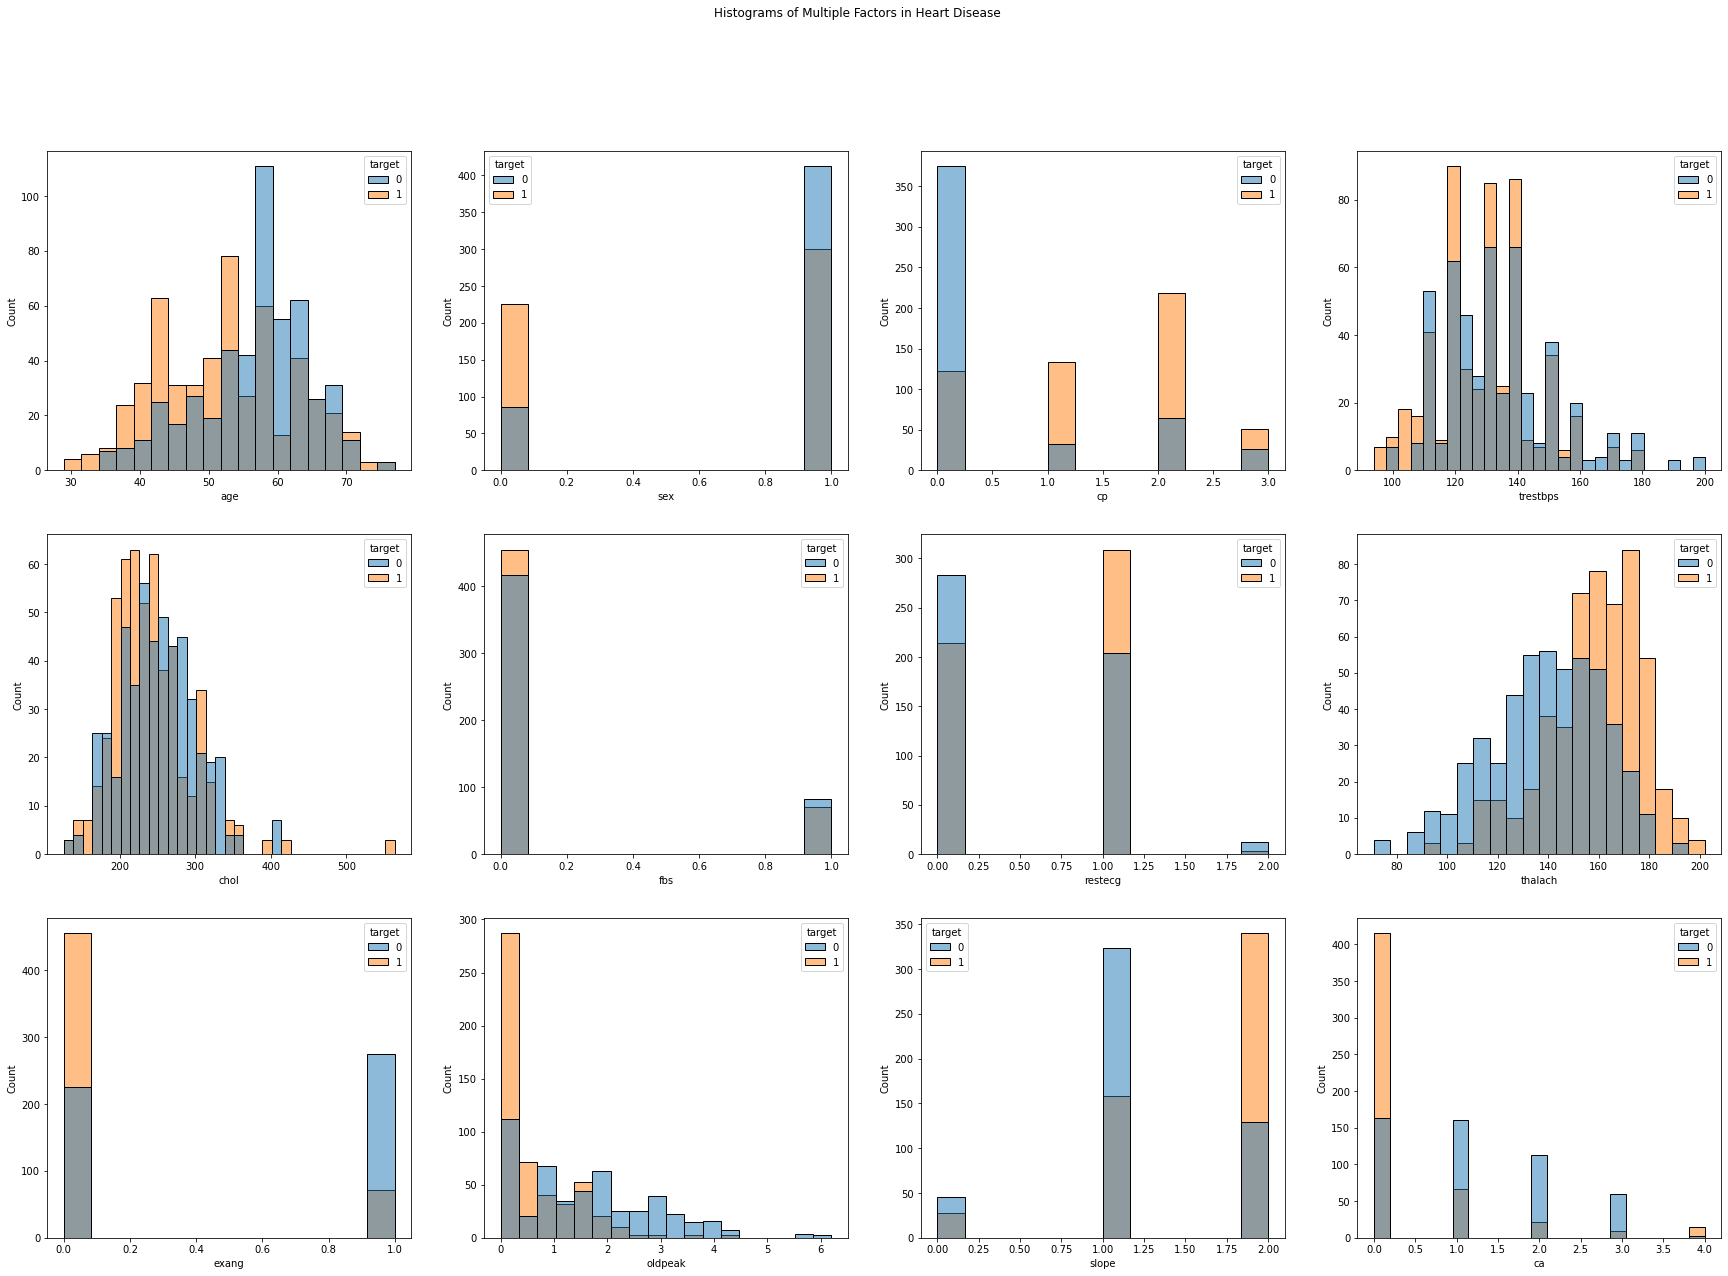

In [211]:
fig, axes = plt.subplots(3, 4, figsize =(30,20))
fig.suptitle("Histograms of Multiple Factors in Heart Disease")

cnt = 0 
for i in range(3):
    for j in range(4):
        sns.histplot(ax = axes[i,j], data=df, x=df.columns[:-2][cnt], hue='target')
        cnt+=1

#In our data, the histogram for thalach seems to show that a thalach level of 150 differentiates a person with heart disease and a person without it. 
#For oldpeak, there is a spike of peopel with heart disease when their oldpeak level is 0. As oldpeak level increases, the amount of people with heart disease drastically decreases in a negative association. 
#For our age histogram, the data shows that people in their early fourties and fifties have the highest frequency of heart disease, with a bimodal peak. 
#The sex histogram shows that females are at a greater risk of contracting heart disease compared to men. Despite there being a lower sample number in the dataset, the amount of females affected are almost as high as men. 
#Our ca histogram shows that people with 0 major vessels infected are at the highest risk of getting heart disease.
#Our slope histogram shows that at a slope of level 2, there is a high amount of people with heart disease. There is also a positive association in which as slope level increase, so do the amount of people that have heart disease. 

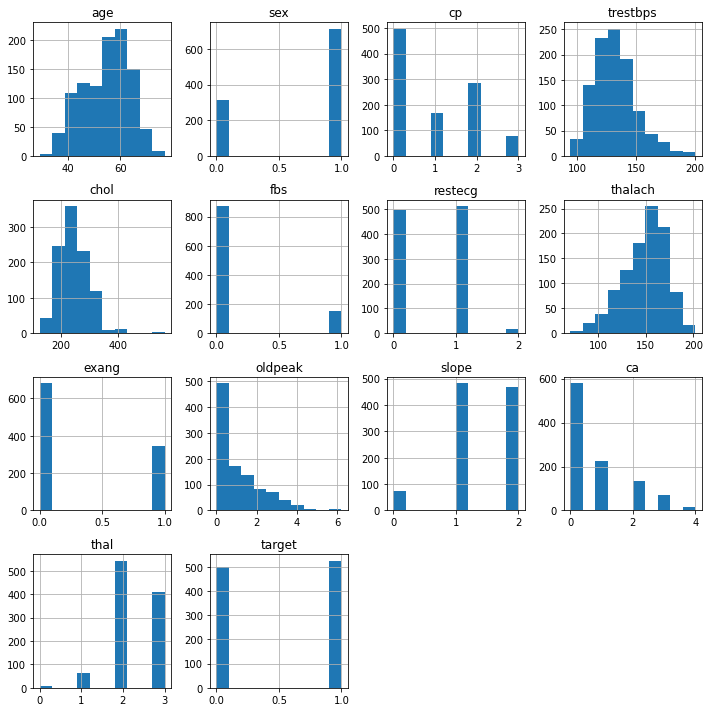

In [186]:
infected = df[df['target']==1]

def draw_histograms(df, variables, n_rows, n_cols, color):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax, figsize = (10,10) )
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()


draw_histograms(df, df.columns, 4, 4,color = 'target')

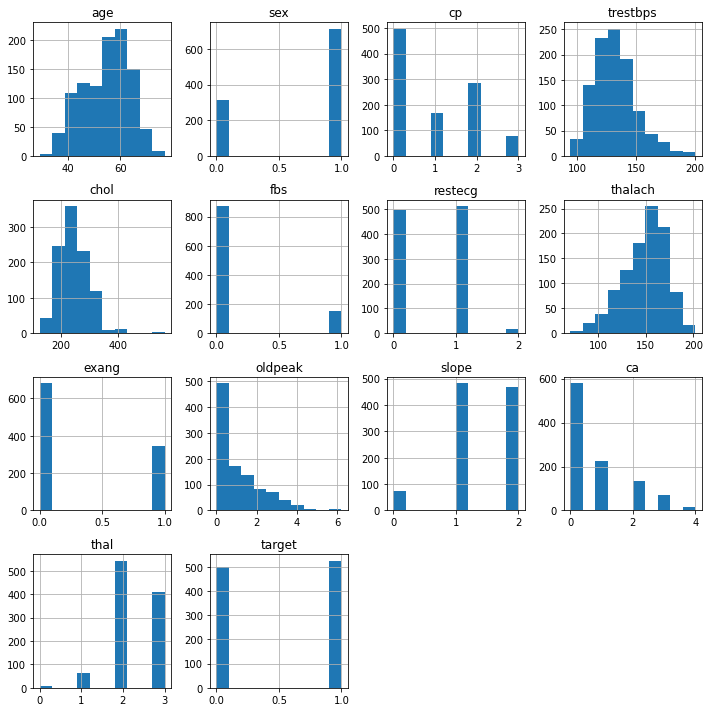

In [168]:


infected = df[df['target']==1]

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax, figsize = (10,10) )
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()


draw_histograms(df, df.columns, 4, 4,)
#These histograms represent the data of those with and without heart disease